<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Need)</span></div>

# What to expect in this chapter

In this chapter, I will show you how to generate high-quality, publication-ready plots using Python. You can readily use this knowledge in your other modules (for example, when writing reports for your experiments). There are many packages (e.g., Matplotlib, Plotty, Seaborn, Bokeh, Folium) that you can use to plot with Python. Of these, Matplotlib is the most popular and most versatile. Since some other packages are built using Matplotlib, it is usually good to know your way around Matplotlib first.

In [5]:
from matplotlib import pyplot as plt

# 1 A simple plot

## 1.1 Let’s look at some code.

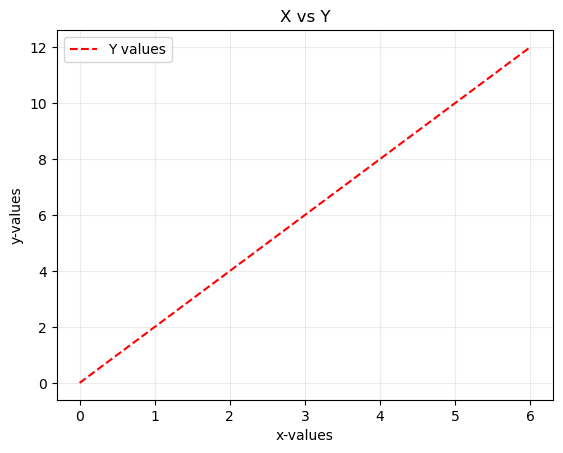

In [2]:
# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]

# Let's start plotting
plt.plot(x, y_1, label='Y values',
         color='red', linestyle='dashed')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper left')

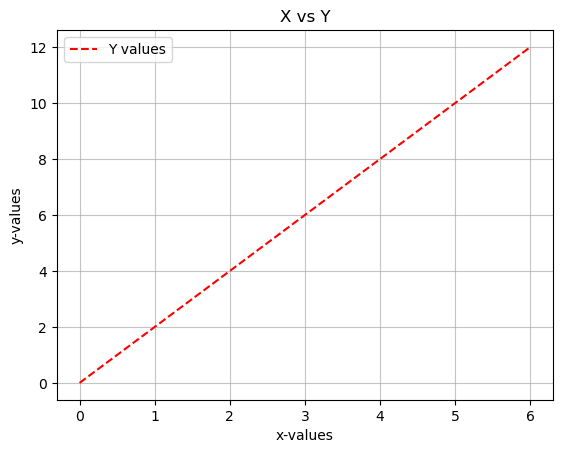

In [8]:
# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]

# Let's start plotting
plt.plot(x, y_1, label='Y values',
         color='red', linestyle='dashed')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.75)
plt.legend(loc='upper left')

### Things to note

You can use the following abbreviations if you like:
    
|Long form   |Abbreviation|
|:---|---:|
|color|c|
|linestyle|ls|
|linewidth|lw|


Jupyter is an interactive environment, so you will see an output even if you omit plt.show(). However, it is good practice to include this line anyway so your code will also work in non-interactive environments (for instance, when the script is run directly from the command line).

The plotting functions usually have default values for the styling parameters. So, if you wish, you can keep it simple and plot just using:

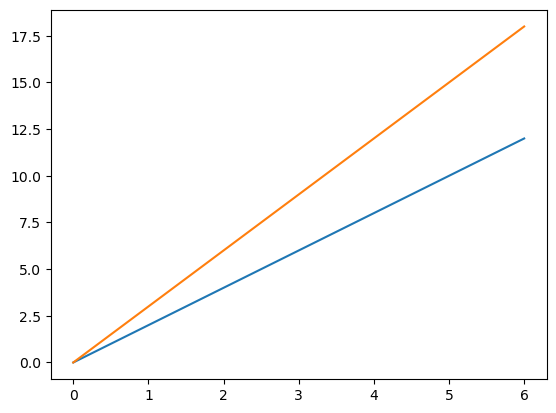

In [10]:
plt.plot(x, y_1, y_2)

You can split the arguments into separate lines to improve readability.
So, both of the following forms are acceptable.

In [13]:
# plt.plot(x, y, color='red', linestyle='dashed', linewidth=2)
# plt.plot(x, y_1, label='Y values',
           #color='red', linestyle='dashed')

The order of how you specify the keyword arguments (color, linewidth, …) does not matter.

## 1.2 Adding another plot

You can add another plot command to the graph to plot the data of y_2 in blue by adding the following line.

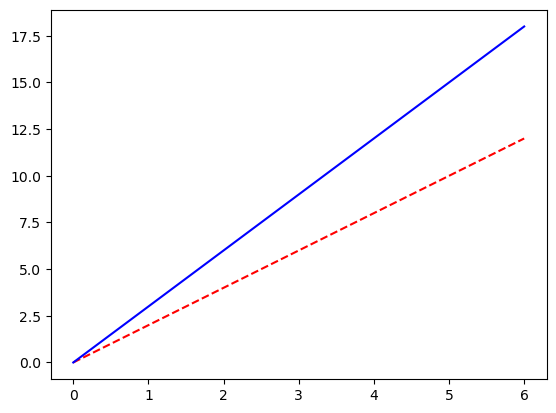

In [15]:
plt.plot(x, y_1, label='Y values',
           color='red', linestyle='dashed')
plt.plot(x, y_2,
         label='Y2 values', color='blue')

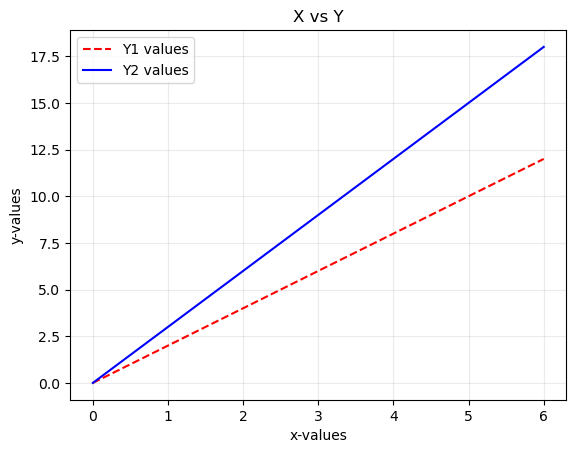

In [16]:
# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]

# Lets start plotting
plt.plot(x, y_1, label='Y1 values', color='red', linestyle='dashed')
plt.plot(x, y_2, label='Y2 values', color='blue')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper left')

## 1.3 Yet another plot but with error bars

Let me add another plot, but this time I will also include x and y error bars for the points. The plotting command I need to use for this is called errorbar().

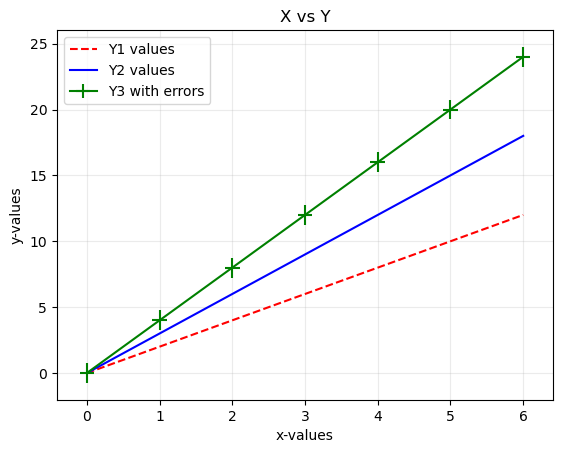

In [17]:
# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]
y_3 = [0, 4, 8, 12, 16, 20, 24]
x_error, y_error = .1, 0.75

# Lets start plotting
plt.plot(x, y_1, label='Y1 values', color='red', linestyle='dashed',)
plt.plot(x, y_2, label='Y2 values', color='blue', )
plt.errorbar(x, y_3, xerr=x_error, yerr=y_error,
             label='Y3 with errors', color='green')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper left')

In this example, I have provided constant errors for all the points. However, you can also provide a list of errors so that each will have a different length.

# 2 Better with NumPy

Often, it is easier to use NumPy arrays instead of Python lists. So, let’s first convert the Python lists into NumPy arrays and then redo the plot in the previous step.

In [3]:
import numpy as np

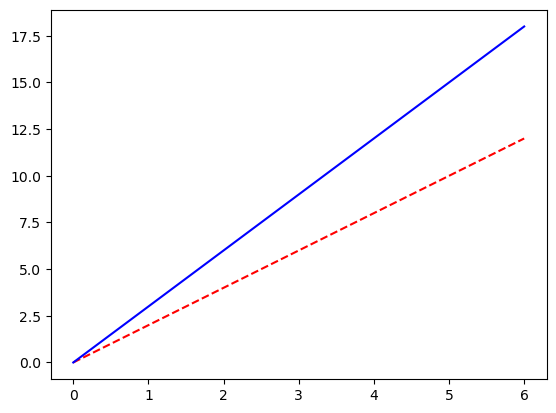

In [20]:
# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]

np_x = np.array(x)
np_y_1 = np.array(y_1)
np_y_2 = np.array(y_2)

plt.plot(np_x, np_y_1, color='red', linestyle='dashed', label='Y values')
plt.plot(np_x, np_y_2, color='blue', label='Y2 values')

## 2.1 Adding mathematical functions

One of the advantages of NumPy arrays is that they allow us to generate data-related mathematical functions easily. 

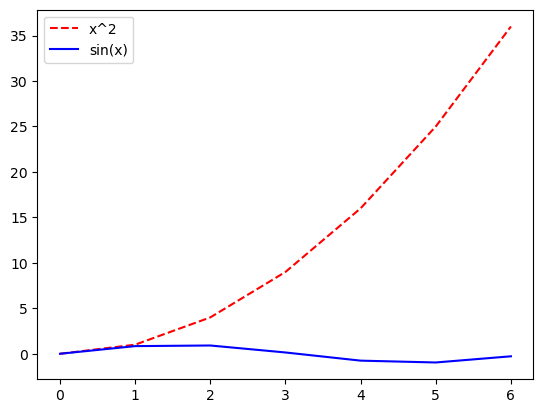

In [21]:
x = np.array([0, 1, 2, 3, 4, 5, 6])

x2 = x**2                  # The math stuff
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',
         color='red', linestyle='dashed', )
plt.plot(x, sin_x, label='sin(x)',
         color='blue')
plt.legend()                                 

Alas, our plot does not look good because sin(x) lies between +/- 1, but has no such bounds. One way to fix this is to add another y-axis that shares the same x-axis.

## We need another axis!

Matplotlib offers a variety of ways to have multiple axes. The simplest way is to have another y-axis that shares the same x-axis. We can use the command twinx() for this.

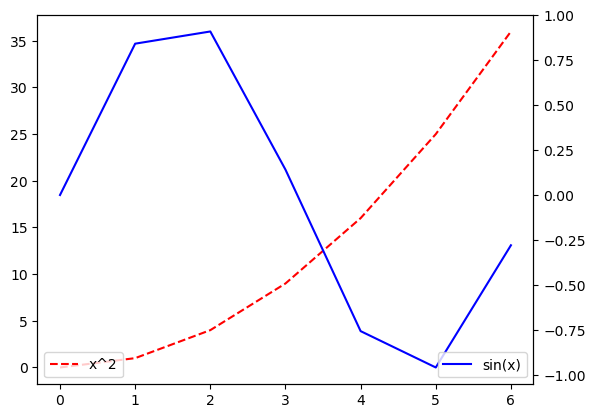

In [24]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',color='red', linestyle='dashed')
plt.legend(loc='lower left')                                  # For y-axis 1

plt.twinx()                                                   # This creates a new y-axis 
                                                              # for the plots that comes after
plt.plot(x, sin_x, label='sin(x)',color='blue', )
plt.legend(loc='lower right')                                 # For y-axis 2

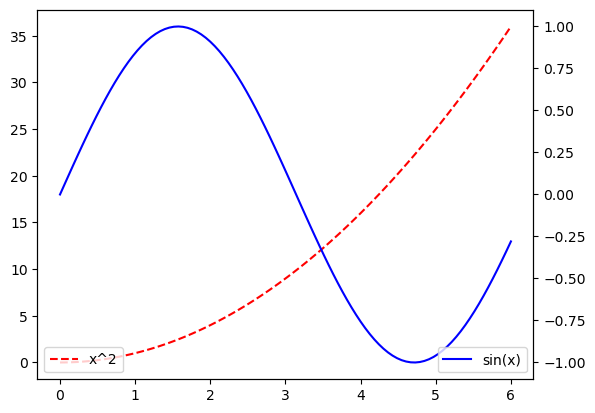

In [27]:
x = np.linspace(0, 6, 100)
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',color='red', linestyle='dashed')
plt.legend(loc='lower left')                                  # For y-axis 1

plt.twinx()                                                   # This creates a new y-axis 
                                                              # for the plots that comes after
plt.plot(x, sin_x, label='sin(x)',color='blue', )
plt.legend(loc='lower right')                                 # For y-axis 2


# 3 Saving to disc

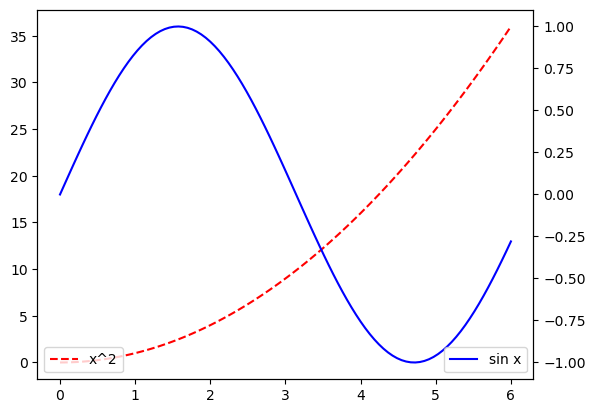

In [28]:
x = np.linspace(0, 6, 100)
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',
         color='red', linestyle='dashed')
plt.legend(loc='lower left')
plt.twinx()
plt.plot(x, sin_x,
         label='sin x', color='blue')
plt.legend(loc='lower right')

plt.savefig('simple-plot.png', dpi=150)

If you want to use your plot in a report or presentation, you must first save it to disk. Luckily, Matplotlib makes it astonishingly easy to export plots into many formats (PDF, JPEG, PNG, BMP, etc.) and at different resolutions.

- We need to use the function savefig() for this.
- We specify the format with the extension (e.g., filename.pdf) of the file name,
- We specify resolution by use dots-per-inch (dpi).

When you run this code, you will find the file saved in the same directory (folder) as the one in your notebook lives in. If you want it saved elsewhere, specify the path in more detail. For example:

In [3]:
plt.savefig('C://Desktop/simple-plot.png', dpi=150)

FileNotFoundError: [Errno 2] No such file or directory: 'C://Desktop/simple-plot.png'

<Figure size 640x480 with 0 Axes>

# 4 A real example: Global Warming

## 4.1 Plotting data from files

Plotting data stored in a file (e.g., spreadsheet, text file, database) is a routine task for a scientist. In fact, the first thing you should do with any data is to look at it with a simple plot.

For the rest of this section, I will use the Earth’s land temperature data from the Berkeley Earth website. Please visit the site (Global Warming 
 Data Overview) and download the average temperature data for Daily Land. The original name of the file should be Complete_TAVG_daily.txt

In [1]:
import requests

url = "https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Raw_TAVG_complete.txt"
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content to a file with the desired name
    with open("Complete_TAVG_daily.txt", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


File downloaded successfully.


(-8.0, 8.0)

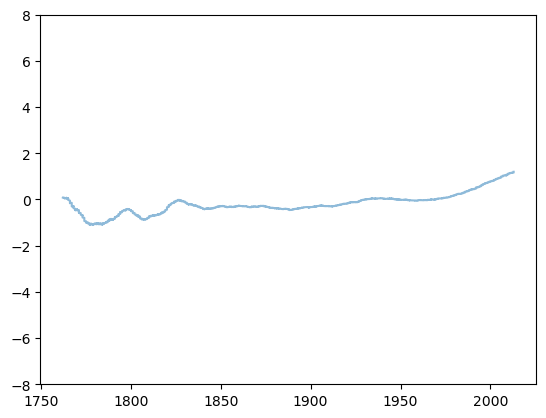

In [6]:
data = np.loadtxt('Complete_TAVG_daily.txt',
                   skiprows=47)
date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.ylim([-8, 8])

(-8.0, 8.0)

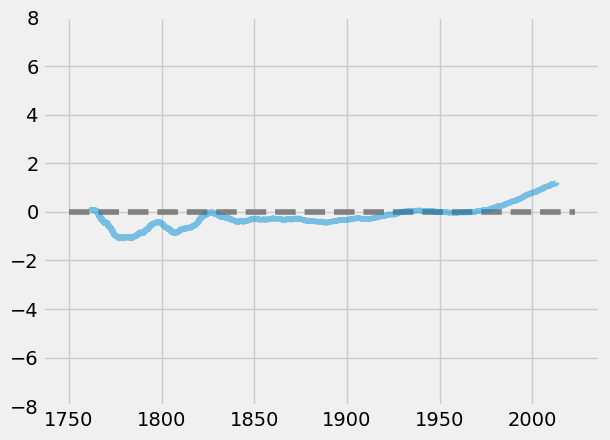

In [11]:
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey')

data = np.loadtxt('Complete_TAVG_daily.txt',
                   skiprows=47)
date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.ylim([-8, 8])

## 4.2 Styles

To achieve a visually appealing plot without investing time in customization, Matplotlib provides predefined style templates (refer to this link). The one named "fivethirtyeight" will be chosen.

Text(0.5, 1.0, 'Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

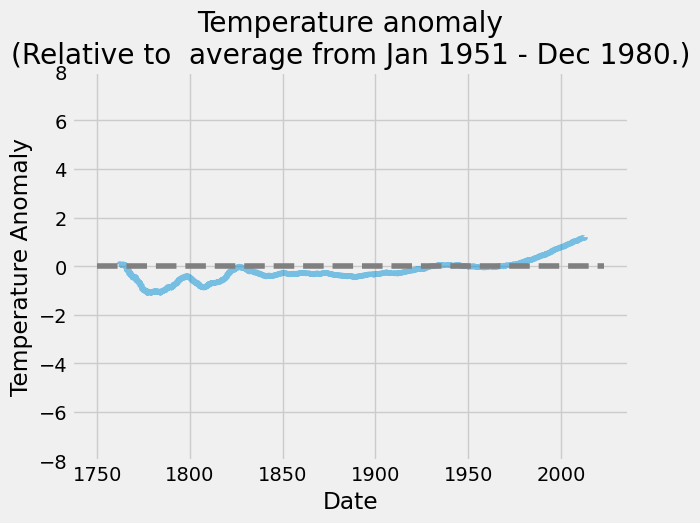

In [8]:
#To insert a straight line
plt.style.use('fivethirtyeight')

data = np.loadtxt('Complete_TAVG_daily.txt', skiprows=47)

date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey')
plt.ylim([-8, 8])

plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

### xkcd!

Matplotlib have included the option of making your plots in the xkcd style. To enable this, just run plt.xkcd() instead of setting a style. Here is what the previous plot looks like using the xkcd style:

Text(0.5, 1.0, 'Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family '

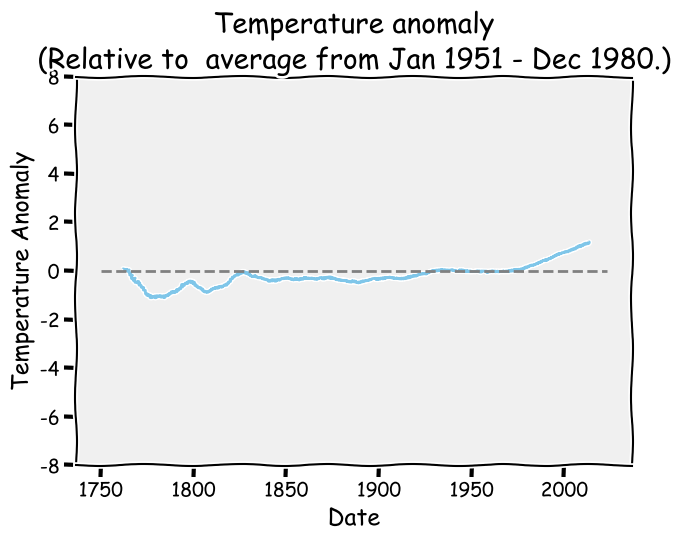

In [17]:
plt.xkcd()

data = np.loadtxt('Complete_TAVG_daily.txt', skiprows=47)

date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey')
plt.ylim([-8, 8])

plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')


### Resetting styles

Text(0.5, 1.0, 'Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

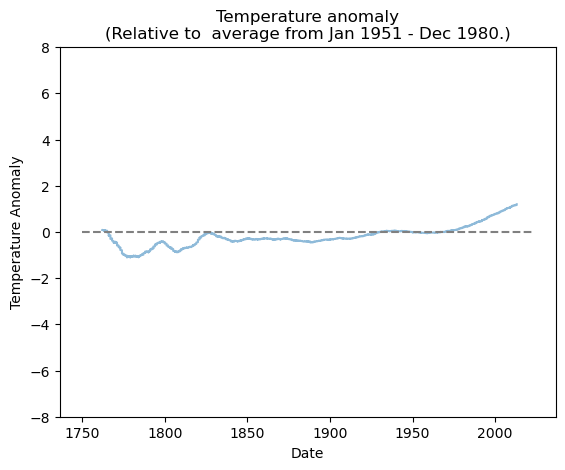

In [18]:
#To reset things and jump out of this style:

plt.style.use('default')
data = np.loadtxt('Complete_TAVG_daily.txt', skiprows=47)

date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey')
plt.ylim([-8, 8])

plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')
